# Proyecto Final Data Science I
## Análisis de reservas de hoteles

## 📌 Abstract

📊 En este proyecto analizamos un dataset de reservas hoteleras para identificar patrones que puedan estar relacionados con la **cancelación de reservas**. El dataset incluye información sobre el tipo de cliente, duración de estadía, canal de adquisición, tipo de hotel, país de origen, entre otras variables relevantes.

🎯 El objetivo principal es explorar si existen **factores asociados a una mayor probabilidad de cancelación**. Para ello, se plantean hipótesis sobre la influencia del lead time (días de anticipación), el canal de reserva y el tipo de habitación.

🛠️ El análisis se basa en técnicas de **estadística descriptiva y visualización de datos** mediante gráficos como boxplots, countplots y mapas de calor. Estas herramientas permiten detectar relaciones significativas entre variables categóricas y numéricas, y sentar las bases para análisis más avanzados en futuras etapas.



### ❓ Preguntas e hipótesis de análisis

1. 📅 Las reservas realizadas con mayor anticipación (**lead time**) tienen mayor probabilidad de ser canceladas.
2. 🌐 El **canal de adquisición** influye en la probabilidad de cancelación.
3. 🏨 El **tipo de habitación reservada** está relacionado con la tasa de cancelaciones.

In [2]:
# Carga del dataset
import pandas as pd

# Conectamos con Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Definimos la ruta
general_folder = '/content/drive/My Drive/CODERHOUSE/2_Data_Science_I'
data_folder = '/DataSets/6_reservas_hoteles.csv'
data_path = general_folder + data_folder

# Leemos el archivo
df = pd.read_csv(data_path)
df.head()


Mounted at /content/drive


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled



### 🔍 Descripción general del dataset

Vamos a explorar la estructura general del conjunto de datos y obtener estadísticas descriptivas básicas.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### 📄 Observaciones del `df.info()`

- El dataset contiene **36.275 filas** y **19 columnas**, combinando variables **numéricas** (como `lead_time`, `avg_price_per_room`) y **categóricas** (`type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, etc.).

- Las variables de tipo `object` serán tratadas como **categóricas** durante el análisis.

- ✅ **No se observan valores nulos**, lo que sugiere que **no será necesario imputar ni eliminar** datos por este motivo.


### 📋 Estadísticas descriptivas generales
Exploramos las estadísticas básicas para tener una idea inicial de la distribución de las variables numéricas.

In [4]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


### 📊 Observaciones del `df.describe()`

- La mayoría de las reservas incluyen entre **1 y 2 adultos** (`mean ≈ 1.84`), sin niños (`mean ≈ 0.10`). La mediana para ambas variables sugiere que **las familias con niños son una minoría**.

- La **estadía promedio** es de aproximadamente **2 noches entre semana** y **1 noche de fin de semana**, con un máximo de hasta 17 noches (`no_of_week_nights`) y 7 noches (`no_of_weekend_nights`), lo que indica **gran variabilidad en la duración de las estadías**.

- El **lead time** (tiempo de anticipación de la reserva) tiene una media de **85 días**, pero puede llegar hasta **443 días**, lo que refleja la existencia de **reservas muy planificadas** y **otras de último momento**.

- La variable **`avg_price_per_room`** tiene una media de **103.4**, pero con valores que van desde **0 hasta 540**, lo que podría señalar **tarifas promocionales, errores de carga o tipos de habitación muy exclusivos**.

- Casi no hay **clientes repetidos** (`repeated_guest mean ≈ 0.03`) ni **cancelaciones previas** (`no_of_previous_cancellations mean ≈ 0.02`), lo cual sugiere que **la mayoría son nuevos clientes**.

- Los **requerimientos especiales** son poco frecuentes (`mean ≈ 0.6`), aunque algunos casos llegan hasta 5 solicitudes, posiblemente vinculados a eventos o necesidades particulares.

📌 En resumen: el dataset presenta **una alta dispersión en variables clave** como precio, anticipación y duración de la estadía, lo que será útil para identificar perfiles de reserva y riesgos de cancelación.



### 🧼 Análisis de valores nulos

Revisamos qué columnas contienen valores perdidos y en qué cantidad (en porcentaje):


In [5]:
(df.isna().sum()/df.shape[0])*100

,0
Booking_ID,0.0
no_of_adults,0.0
no_of_children,0.0
no_of_weekend_nights,0.0
no_of_week_nights,0.0
type_of_meal_plan,0.0
required_car_parking_space,0.0
room_type_reserved,0.0
lead_time,0.0
arrival_year,0.0


### 📌 Observación sobre valores faltantes

El análisis de valores nulos muestra que **no hay columnas con datos faltantes significativos**. Esto simplifica el proceso de limpieza, ya que **no será necesario imputar ni eliminar registros por este motivo**.

✅ El dataset está completo y listo para el análisis exploratorio.



### 📊 Visualizaciones exploratorias
A continuación se presentan distintos gráficos utilizando variables del dataset, con el objetivo de analizar las hipótesis planteadas.


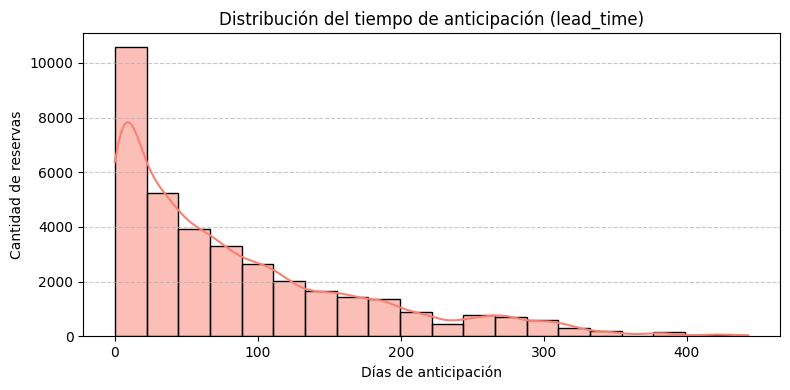

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma con curva de densidad
plt.figure(figsize=(8, 4))
sns.histplot(df['lead_time'], bins=20, kde=True, color='salmon', edgecolor='black')
plt.title('Distribución del tiempo de anticipación (lead_time)')
plt.xlabel('Días de anticipación')
plt.ylabel('Cantidad de reservas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

🧠 Interpretación del gráfico

Este gráfico muestra la **distribución del tiempo de anticipación (`lead_time`)** con el que se realizan las reservas.

🔍 **Observaciones destacadas**:

- La mayoría de las reservas se realizan con **menos de 30 días de anticipación**.
- A medida que aumenta el `lead_time`, disminuye progresivamente la cantidad de reservas.
- Aunque en menor cantidad, existen reservas realizadas con **más de 300 días de antelación**.

📌 **Conclusión**: Este comportamiento indica que, en general, los huéspedes tienden a **definir sus viajes con poca anticipación**, aunque también existe un grupo que planifica con mucha antelación. Esto sirve como contexto para analizar su posible relación con las cancelaciones.


### 🥧 Proporción de reservas canceladas

Antes de analizar qué factores influyen en la cancelación de reservas, es útil conocer cuántas reservas fueron efectivamente canceladas en el dataset. A continuación, presentamos un gráfico de torta que muestra la proporción entre reservas canceladas y no canceladas.

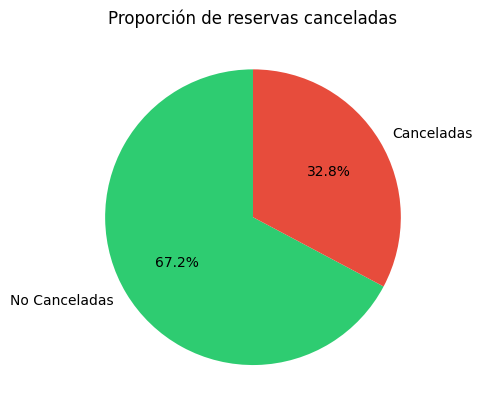

In [7]:
# Distribución de reservas canceladas vs no canceladas
df['booking_status'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['No Canceladas', 'Canceladas'],
    startangle=90,
    colors=['#2ecc71', '#e74c3c']
)
plt.title('Proporción de reservas canceladas')
plt.ylabel('')
plt.show()

🧠 **Interpretación del gráfico**

Este gráfico de torta muestra la proporción de reservas que fueron canceladas frente a las que no lo fueron, considerando el total de datos disponibles.

🔍 **Observaciones destacadas**:

- Una parte considerable de las reservas fue cancelada (representada en rojo).
- Esta distribución respalda la importancia de estudiar las **características asociadas a las cancelaciones**, como el canal de adquisición, el tipo de habitación o la anticipación con la que se hizo la reserva.

📌 **Conclusión**:  
Este gráfico sirve como punto de partida visual para analizar los factores que influyen en la cancelación de reservas, en línea con las hipótesis planteadas.

### 📊 **Análisis de la relación entre cancelación y lead time**

 En este apartado, exploramos si existe una relación entre la variable objetivo `booking_status` (cancelada o no cancelada) y el `lead_time`, es decir, la cantidad de días entre la fecha de reserva y la fecha de ingreso.

 La hipótesis que queremos validar visualmente es:  
 **¿Las reservas que se realizan con mayor anticipación tienen más chances de cancelarse?**

 Para esto, creamos la variable `is_canceled` que codifica las reservas como 1 (canceladas) y 0 (no canceladas), y luego comparamos la distribución del `lead_time` entre ambos grupos mediante un boxplot.


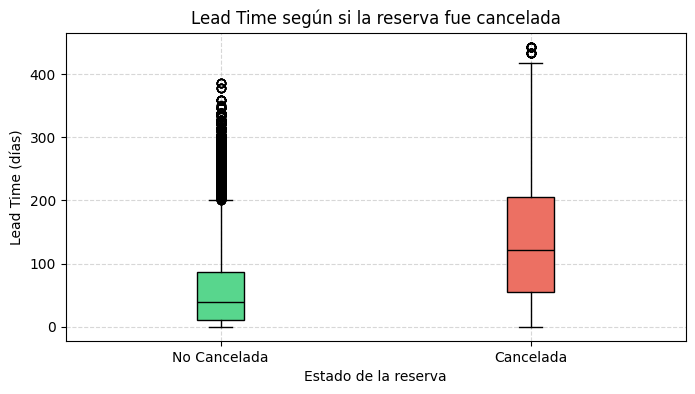

In [8]:
# Creo una nueva columna
df['is_canceled'] = df['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

# Dividimos los datos según cancelación
lead_time_canceled = df[df['is_canceled'] == 1]['lead_time']
lead_time_not_canceled = df[df['is_canceled'] == 0]['lead_time']

# Preparamos el gráfico
plt.figure(figsize=(8, 4))
box = plt.boxplot([lead_time_not_canceled, lead_time_canceled],
                  tick_labels=['No Cancelada', 'Cancelada'],
                  patch_artist=True,
                  boxprops=dict(color="black"),
                  medianprops=dict(color="black"))

# Crear colores para el estado de la reserva
colors = ['#58D68D', '#EC7063']  # verde para no cancelada, rojo para cancelada

# Aplicamos colores a cada caja
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Lead Time según si la reserva fue cancelada')
plt.xlabel('Estado de la reserva')
plt.ylabel('Lead Time (días)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


🧠 Interpretación del gráfico

Este gráfico compara el **tiempo de anticipación (`lead_time`)** según si la reserva fue **cancelada (1)** o **no cancelada (0)**.

🔍 **Observaciones destacadas**:

- Las reservas **canceladas** presentan un `lead_time` **notablemente mayor** que las no canceladas.
- Las reservas **no canceladas** suelen realizarse con **menos anticipación** y muestran menor variabilidad.
- Hay **valores atípicos** en ambos grupos, pero son más frecuentes en las reservas no canceladas con `lead_time` bajos.

📌 **Conclusión**: Este análisis **refuerza la hipótesis** de que **cuanto mayor es el tiempo de anticipación**, **más probable es que la reserva se cancele**. Esto puede deberse a cambios de planes o imprevistos que surgen con el paso del tiempo.

### 📊 **Análisis de las cancelaciones según el segmento de mercado**

En este apartado, exploramos cómo varía la tasa de cancelación entre los diferentes segmentos de mercado. La hipótesis que buscamos analizar visualmente es:  
**¿Existen segmentos de mercado con una mayor tasa de cancelación?**

Para ello, utilizamos un gráfico de barras (`countplot`) que compara la cantidad de reservas canceladas por cada segmento de mercado. La variable `is_canceled` nos permite diferenciar entre reservas canceladas y no canceladas, representadas mediante diferentes colores. Esto nos permitirá identificar tendencias o diferencias notables en la propensión a cancelar entre los distintos tipos de clientes.

El gráfico resultante mostrará en el eje X los segmentos de mercado y en el eje Y la cantidad de reservas, permitiendo una visualización clara de las cancelaciones por segmento. 📊

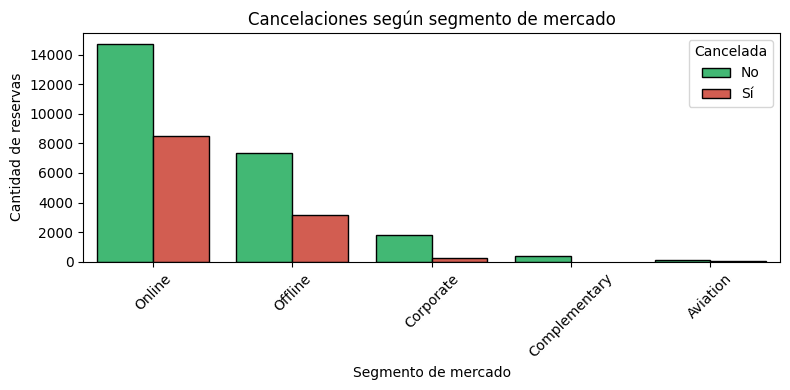

In [9]:
# Ordeno los segmentos de mercado por cantidad total de reservas
orden_segmentos = df['market_segment_type'].value_counts().index

# Countplot del segmento de mercado según cancelación
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='market_segment_type', hue='is_canceled', order=orden_segmentos, edgecolor='black', palette=['#2ecc71', '#e74c3c'])
plt.title('Cancelaciones según segmento de mercado')
plt.xlabel('Segmento de mercado')
plt.ylabel('Cantidad de reservas')
plt.legend(title='Cancelada', labels=['No', 'Sí'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


🧠 Interpretación del gráfico

Este gráfico compara la cantidad de reservas canceladas y no canceladas según el segmento de mercado del que provienen.

🔍 Observaciones destacadas:

- El segmento **Online** concentra la mayor cantidad de reservas canceladas, lo que podría asociarse a una mayor volatilidad en este canal.  
- Las reservas **Offline** también son numerosas, pero presentan una **menor proporción de cancelaciones** en comparación con el segmento Online.  
- Segmentos como **Corporate**, **Aviation** y **Complementary** representan una porción significativamente menor del total de reservas, con una incidencia de cancelaciones muy baja.

📌 Conclusión:

El canal de adquisición de la reserva parece tener un impacto relevante en la probabilidad de cancelación. Este hallazgo **respalda la hipótesis** de que ciertos segmentos de mercado están más asociados a comportamientos de cancelación que otros.

### 🥧 Distribución de cancelaciones por segmento de mercado

Para visualizar de forma clara la **proporción de cancelaciones según el canal de adquisición**, se utiliza un gráfico de torta (*pie chart*).



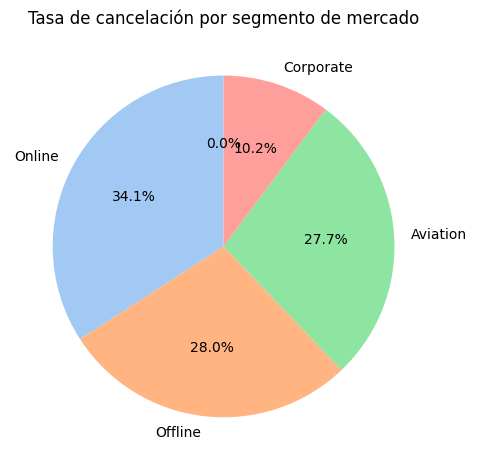

In [10]:
# Cálculo de la tasa de cancelación promedio por segmento
cancel_rate = df.groupby('market_segment_type')['is_canceled'].mean().sort_values(ascending=False)

# Gráfico de torta
cancel_rate.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Tasa de cancelación por segmento de mercado')
plt.ylabel('')  # Elimina el label por defecto
plt.tight_layout()
plt.show()

🧠 **Interpretación del gráfico**  

Este gráfico muestra la **proporción de cancelación promedio en cada segmento**:

- **Online** representa el segmento con **mayor peso en cancelaciones**, lo que refuerza su incidencia en la política de reservas.  
- **Offline y Aviation** también aportan una proporción significativa.   
- **Corporate** tiene una incidencia mucho menor.  
- **Complementary** prácticamente no contribuye a las cancelaciones.  

📌 **Conclusión**: Esta visualización **complementa y refuerza la hipótesis** de que el **canal de adquisición está relacionado con la probabilidad de cancelación**, al mostrar cómo se distribuyen proporcionalmente las tasas entre los distintos segmentos.


### 📊 **Análisis de cancelaciones por tipo de habitación**

Este gráfico nos permite ver cuántas reservas fueron canceladas o no, según el tipo de habitación.

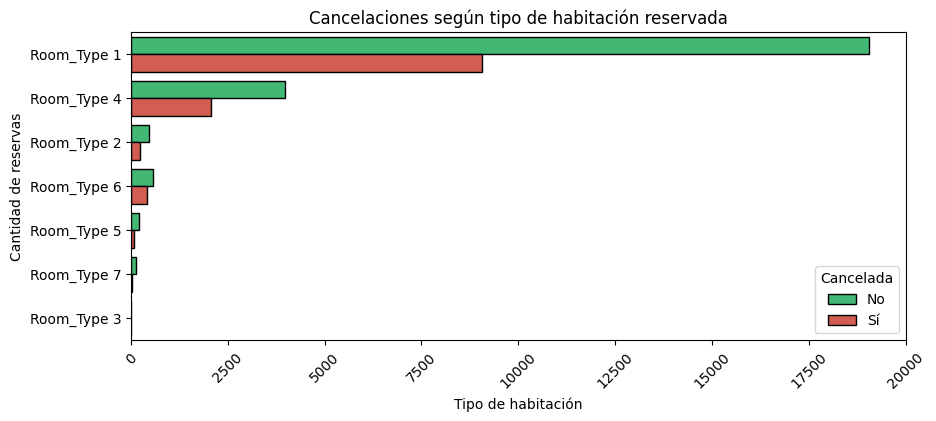

In [11]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, y='room_type_reserved', hue='is_canceled', edgecolor='black', palette=['#2ecc71', '#e74c3c'])
plt.title('Cancelaciones según tipo de habitación reservada')
plt.xlabel('Tipo de habitación')
plt.ylabel('Cantidad de reservas')
plt.xticks(rotation=45)
plt.legend(title='Cancelada', labels=['No', 'Sí'], loc='lower right') # uso 'loc' para mover la caja de leyenda que se estaba superponiéndo con los datos
plt.show()

🧠 Interpretación del gráfico

Este gráfico compara la cantidad de reservas canceladas y no canceladas para cada tipo de habitación reservada, utilizando **barras verticales**.

🔍 **Observaciones clave:**

*   La mayoría de las reservas corresponden a la _Room_Type 1_, que también tiene la mayor cantidad de cancelaciones.
*   El resto de los tipos de habitación tienen muchas menos reservas en general, pero es posible observar algunas diferencias en la proporción de cancelaciones.
*   Por ejemplo, _Room_Type 4_ también muestra un volumen relevante de reservas canceladas.

📌 **Conclusión:**  
Este análisis aporta evidencia sobre la hipótesis de que _el tipo de habitación reservada está relacionado con la tasa de cancelaciones_. Se puede profundizar aún más con un análisis porcentual por tipo de habitación.

### 🔎 Relación entre Lead Time y Precio Promedio por Habitación

En este gráfico de dispersión exploramos la posible relación entre la anticipación con la que se realiza una reserva (`lead_time`) y el precio promedio por habitación (`avg_price_per_room`). Además, diferenciamos las reservas canceladas y no canceladas a través del color.

El objetivo es visualizar si las reservas hechas con mayor anticipación y distintos precios promedio tienen diferentes comportamientos respecto a la cancelación, lo que podría aportar información para predecir la variable objetivo `is_canceled`.


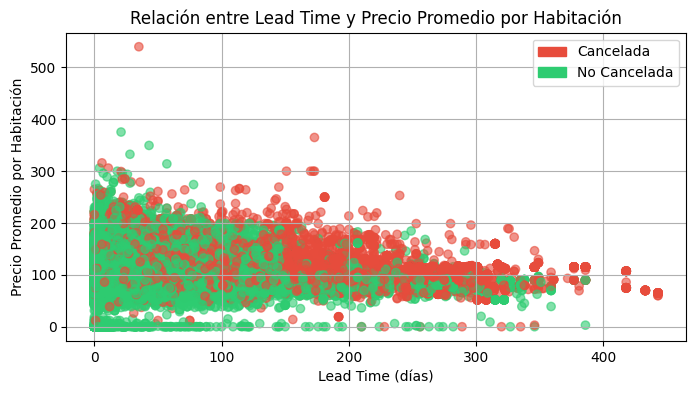

In [12]:
# Crear colores para el estado de la reserva
colors = df['booking_status'].apply(lambda x: '#e74c3c' if x == 'Canceled' else '#2ecc71')

plt.figure(figsize=(8,4))
plt.scatter(df['lead_time'], df['avg_price_per_room'], c=colors, alpha=0.6)

plt.title('Relación entre Lead Time y Precio Promedio por Habitación')
plt.xlabel('Lead Time (días)')
plt.ylabel('Precio Promedio por Habitación')
plt.grid(True)

# Crear leyenda manualmente
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='#e74c3c', label='Cancelada')
green_patch = mpatches.Patch(color='#2ecc71', label='No Cancelada')
plt.legend(handles=[red_patch, green_patch])
plt.show()


🧠 Interpretación del gráfico

Este gráfico muestra la relación entre el _Lead Time_ (cantidad de días entre la reserva y el check-in) y el _Precio Promedio por Habitación_, diferenciando entre reservas **canceladas** y **no canceladas**.

🔍 **Observaciones clave:**

* Las reservas **canceladas** (en rojo) tienden a tener un _lead time_ mayor, es decir, fueron hechas con más anticipación.
* En cambio, las reservas **no canceladas** (en verde) se concentran mayormente en valores de _lead time_ bajos.
* A nivel de precios, ambas categorías están bastante distribuidas, pero se observa una mayor dispersión en los precios de las reservas canceladas.

📌 **Conclusión:**  
Este gráfico respalda la hipótesis de que _a mayor anticipación en la reserva, mayor probabilidad de cancelación_. Esto podría deberse a cambios en los planes de los huéspedes con el paso del tiempo. Sería interesante profundizar este análisis, por ejemplo, segmentando por canal de reserva o tipo de cliente.


### 🔥 Matriz de correlación entre variables clave

Con el objetivo de evaluar nuestras hipótesis, realizamos un análisis de correlación focalizado en las siguientes variables numéricas:

- `lead_time`: anticipación con la que se realiza la reserva.
- `avg_price_per_room`: precio promedio por noche.
- `no_of_special_requests`: cantidad de solicitudes especiales.

Este análisis busca identificar posibles relaciones entre estas variables y la cancelación de reservas.

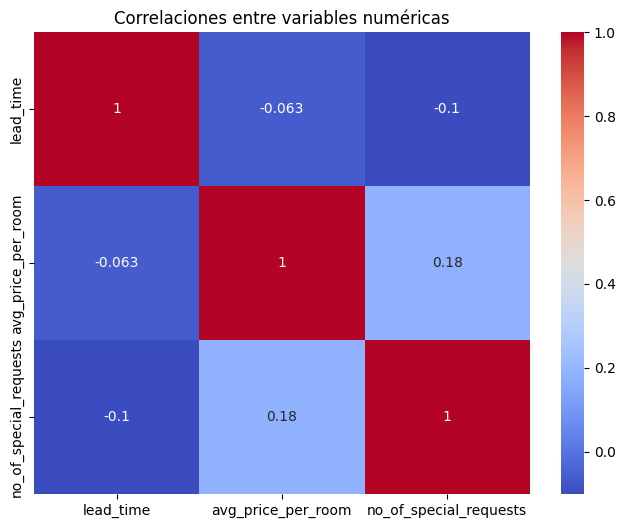

In [13]:
# Mapa de calor de correlaciones (sin is_canceled)
plt.figure(figsize=(8, 6))
variables_interes = ['lead_time', 'avg_price_per_room', 'no_of_special_requests']
sns.heatmap(df[variables_interes].corr(), annot=True, cmap='coolwarm')
plt.title("Correlaciones entre variables numéricas")
plt.show()

🧠 Interpretación de correlaciones

El nuevo mapa de calor muestra la relación entre variables numéricas clave del dataset, excluyendo variables discretas como `is_canceled`, ya que su inclusión puede llevar a interpretaciones erróneas.

- 🕒 **`lead_time` (tiempo de anticipación de la reserva)** tiene una correlación muy débil y negativa con las otras variables, lo que indica que su comportamiento es independiente del precio promedio o los pedidos especiales. Esto refuerza la idea de que el tiempo de anticipación podría tener un impacto más específico en la cancelación, que se analizará por separado.

- 🤝 **`no_of_special_requests` (número de pedidos especiales)** y 💰 **`avg_price_per_room` (precio promedio por noche)** muestran una **correlación positiva débil (+0.18)** entre sí, lo que podría sugerir que los huéspedes que pagan más tienden a hacer más pedidos especiales —aunque esta relación es muy leve.

En resumen, este gráfico nos ayuda a entender cómo se relacionan entre sí algunas variables del comportamiento del huésped, dejando para otros análisis (como los boxplots) la relación directa con las cancelaciones.



## 🧩 Conclusiones del análisis exploratorio

A partir del análisis realizado, se identificaron **tendencias claras y consistentes** que respaldan las hipótesis planteadas:

- 🕒 El **lead time** muestra una **correlación positiva moderada** con la cancelación de reservas, lo que confirma que cuanto mayor es la anticipación, mayor es la probabilidad de cancelación.
- 🏨 El análisis del **tipo de habitación reservada** reveló que ciertas categorías, especialmente *Room_Type 1*, concentran más cancelaciones. Esto puede deberse a que son las más demandadas o flexibles.
- 🤝 Los huéspedes que realizan **más pedidos especiales** tienden a cancelar menos, lo que sugiere un mayor nivel de compromiso o personalización del servicio.
- 🌐 Se observaron **diferencias significativas en los canales de adquisición**, donde el segmento *Online* presenta una tasa de cancelación más alta en comparación con otros, como *Offline* o *Corporate*.

📌 Estos hallazgos brindan una **base sólida para avanzar hacia un análisis más profundo**, donde se buscará validar, cuantificar y modelar estas relaciones mediante técnicas estadísticas y herramientas de machine learning.

## 📦 **Preparación del dataset para el modelado**

Antes de aplicar algoritmos de Machine Learning, es importante **preparar una copia del dataset** que utilizaremos exclusivamente para el entrenamiento y evaluación del modelo.

Esta práctica nos permite:
 - Mantener el dataset original sin modificaciones.
 - Aplicar transformaciones necesarias (como codificación de variables categóricas o escalamiento) sin afectar el análisis previo.
 - Facilitar la depuración de errores y la comparación entre diferentes versiones.

A continuación, crearemos una copia del dataset que utilizaremos para las siguientes etapas de selección de variables, partición de los datos y entrenamiento de modelos de clasificación.


In [14]:
df_modelo = df.copy()

## 🎯 Selección de variables predictoras y variable objetivo

En esta sección vamos a definir las variables que usaremos para entrenar nuestro modelo de clasificación.  
La variable objetivo será `is_canceled`, que indica si una reserva fue cancelada (1) o no (0).  
El conjunto de variables predictoras (`X`) estará compuesto por las variables numéricas y categóricas más relevantes, excluyendo aquellas que no aportan información útil (como IDs, descripciones textuales, fechas, etc.).

Este paso es crucial ya que impacta directamente en la capacidad del modelo de aprender patrones significativos.


In [15]:
# Definimos la variable objetivo
y = df_modelo['is_canceled']

# Seleccionamos variables predictoras
X = df_modelo[['lead_time', 'avg_price_per_room', 'no_of_special_requests', 'no_of_adults','no_of_children', 'no_of_weekend_nights', 'no_of_week_nights']]

X.head()


,lead_time,avg_price_per_room,no_of_special_requests,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights
0,224,65.00,0,2,0,1,2
1,5,106.68,1,2,0,2,3
2,1,60.00,0,1,0,2,1
3,211,100.00,0,2,0,0,2
4,48,94.50,0,2,0,1,1


## ✂️ División del dataset en entrenamiento y prueba

Para evaluar el rendimiento del modelo de forma justa, dividimos el dataset en dos subconjuntos:

- **Conjunto de entrenamiento:** se utiliza para entrenar el modelo.
- **Conjunto de prueba:** se reserva para evaluar el rendimiento del modelo con datos que no ha visto antes.

Esta práctica permite detectar si el modelo se ajusta demasiado a los datos de entrenamiento (overfitting) o si generaliza bien a nuevos datos.

Usamos la función `train_test_split` de Scikit-learn, y asignamos el 80% de los datos al entrenamiento y el 20% a la prueba. Además, fijamos una `random_state` para que la división sea reproducible.


In [16]:
from sklearn.model_selection import train_test_split

# Dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Estratificamos para mantener proporciones de clases
)

# Verificamos las formas de los datasets resultantes
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")


X_train: (29020, 7)
X_test: (7255, 7)
y_train: (29020,)
y_test: (7255,)


✅ Al estratificar por `y`, nos aseguramos de que tanto el conjunto de entrenamiento como el de prueba mantengan la misma proporción de reservas canceladas y no canceladas.  
Esto es especialmente importante en problemas de clasificación donde las clases pueden estar desbalanceadas.


## 🧠 Modelo 1: Árbol de Decisión

En esta sección entrenamos un modelo de clasificación usando un **Árbol de Decisión**.  
Este algoritmo aprende reglas de decisión simples a partir de los datos, dividiendo los casos en ramas según las variables predictoras, hasta llegar a una predicción.

Elegimos este modelo porque es intuitivo, fácil de interpretar y no requiere normalización previa de los datos.

### 🔍 ¿Qué buscamos?
Predecir si una reserva será cancelada (`is_canceled`) en función de variables como el tiempo de anticipación, precio promedio por noche, cantidad de huéspedes, etc.

Entrenamos el modelo con los datos de entrenamiento (`X_train`, `y_train`) y luego evaluamos su desempeño sobre los datos de entrenamiento (`X_train`,` y_train`) y los de prueba (`X_test`, `y_test`).


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Creamos el modelo
modelo_arbol = DecisionTreeClassifier(random_state=42)

# Entrenamos el modelo
modelo_arbol.fit(X_train, y_train)

# Evaluación sobre el conjunto de entrenamiento
y_train_pred_arbol = modelo_arbol.predict(X_train)
accuracy_train_arbol = accuracy_score(y_train, y_train_pred_arbol)

print("🏋️‍♂️ Evaluación en el conjunto de **entrenamiento**:")
print(f"Accuracy: {accuracy_train_arbol:.4f}")
print("Matriz de Confusión:")
print(confusion_matrix(y_train, y_train_pred_arbol))
print("Classification Report:")
print(classification_report(y_train, y_train_pred_arbol))

# Evaluación sobre el conjunto de prueba
y_pred_arbol = modelo_arbol.predict(X_test)
accuracy_test_arbol = accuracy_score(y_test, y_pred_arbol)

print("\n🔍 Evaluación en el conjunto de **prueba**:")
print(f"Accuracy: {accuracy_test_arbol:.4f}")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_arbol))
print("Classification Report:")
print(classification_report(y_test, y_pred_arbol))


🏋️‍♂️ Evaluación en el conjunto de **entrenamiento**:
Accuracy: 0.9902
Matriz de Confusión:
[[19454    58]
 [  227  9281]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19512
           1       0.99      0.98      0.98      9508

    accuracy                           0.99     29020
   macro avg       0.99      0.99      0.99     29020
weighted avg       0.99      0.99      0.99     29020


🔍 Evaluación en el conjunto de **prueba**:
Accuracy: 0.8467
Matriz de Confusión:
[[4342  536]
 [ 576 1801]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4878
           1       0.77      0.76      0.76      2377

    accuracy                           0.85      7255
   macro avg       0.83      0.82      0.83      7255
weighted avg       0.85      0.85      0.85      7255



### 📊 Interpretación de los resultados del Árbol de Decisión

✅ **Accuracy en entrenamiento: 99,02%**  
✅ **Accuracy en prueba: 84,67%**  
El modelo muestra un **sobreajuste considerable**: aprende muy bien los datos de entrenamiento pero pierde precisión en los datos nuevos. Aun así, su desempeño en el conjunto de prueba es sólido.

📉 **Análisis por clase:**

- **Clase 0 (no cancelada):**
  - *Precisión (test):* 0.88  
  - *Recall (test):* 0.89  
  - El modelo clasifica correctamente la mayoría de las reservas no canceladas, aunque baja respecto al entrenamiento.

- **Clase 1 (cancelada):**
  - *Precisión (test):* 0.77  
  - *Recall (test):* 0.76  
  - El desempeño es más débil para detectar correctamente las cancelaciones. El modelo tiende a confundir algunas reservas canceladas como si no lo fueran (falsos negativos).

⚠️ **Nota técnica:**  
El árbol de decisión es un modelo **fácil de interpretar** y capta bien relaciones no lineales, pero **tiende a sobreajustarse** si no se controla su complejidad (por ejemplo, limitando su profundidad o aplicando poda).

🔍 **Conclusión inicial:**  
El árbol de decisión logra un excelente rendimiento en entrenamiento y un buen desempeño general en prueba.  
Si bien el rendimiento es mejor para las reservas que no se cancelan, el resultado general es sólido como primer acercamiento.



## 🧠 Modelo 2: K-Nearest Neighbors (KNN)

El algoritmo de **K-Nearest Neighbors (KNN)** clasifica un nuevo caso según la mayoría de sus *vecinos más cercanos* en el espacio de variables. Es un modelo simple pero poderoso, que se basa en la idea de que "los datos similares tienden a comportarse de forma similar".

🔧 Como KNN se basa en distancias, es importante **escalar las variables numéricas** antes del entrenamiento. Luego, elegimos un valor de *k* (cantidad de vecinos) y evaluamos el modelo con el mismo conjunto de prueba.

Vamos a comenzar con `k=5`, un valor común por defecto.


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Escalamos los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creamos el modelo KNN con k=5
modelo_knn = KNeighborsClassifier(n_neighbors=5)

# Entrenamos el modelo
modelo_knn.fit(X_train_scaled, y_train)

# ====== Evaluación sobre el conjunto de entrenamiento ======
y_train_pred_knn = modelo_knn.predict(X_train_scaled)

print("🏋️‍♂️ Evaluación en el conjunto de **entrenamiento**:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_knn):.4f}")
print("Matriz de Confusión:")
print(confusion_matrix(y_train, y_train_pred_knn))
print("Classification Report:")
print(classification_report(y_train, y_train_pred_knn))

# ====== Evaluación sobre el conjunto de prueba ======
y_pred_knn = modelo_knn.predict(X_test_scaled)

print("\n🔍 Evaluación en el conjunto de **prueba**:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


🏋️‍♂️ Evaluación en el conjunto de **entrenamiento**:
Accuracy: 0.8814
Matriz de Confusión:
[[18286  1226]
 [ 2217  7291]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     19512
           1       0.86      0.77      0.81      9508

    accuracy                           0.88     29020
   macro avg       0.87      0.85      0.86     29020
weighted avg       0.88      0.88      0.88     29020


🔍 Evaluación en el conjunto de **prueba**:
Accuracy: 0.8408
Matriz de Confusión:
[[4411  467]
 [ 688 1689]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      4878
           1       0.78      0.71      0.75      2377

    accuracy                           0.84      7255
   macro avg       0.82      0.81      0.81      7255
weighted avg       0.84      0.84      0.84      7255



### 📊 Interpretación de los resultados de KNN

✅ **Accuracy en entrenamiento: 88,14%**  
✅ **Accuracy en prueba: 84,08%**  
Esto sugiere que el modelo **generaliza razonablemente bien**, aunque hay una leve diferencia que puede indicar **algo de sobreajuste** (overfitting), pero no es extremo.

📉 **Análisis por clase:**

- **Clase 0 (no cancelada):**
  - *Precisión (test):* 0.87  
  - *Recall (test):* 0.90  
  - El modelo tiene muy buen desempeño en identificar correctamente las reservas que no se cancelan.

- **Clase 1 (cancelada):**
  - *Precisión (test):* 0.78  
  - *Recall (test):* 0.71  
  - El desempeño es más débil para detectar correctamente las cancelaciones. El modelo tiende a confundir algunas reservas canceladas como si no lo fueran (falsos negativos).

⚠️ **Nota técnica:**  
KNN se basa en la distancia entre puntos, por lo que es **sensible al ruido y a variables poco relevantes**. Además, **no realiza selección de características**, lo que puede afectar su rendimiento si algunas variables aportan más que otras.



🔍 **Conclusión:**  
Aunque el modelo KNN tiene un rendimiento **aceptable y balanceado**, especialmente para la clase 0, **el árbol de decisión mostró un mejor comportamiento en la clase 1**, que es clave si nuestro objetivo es **anticipar cancelaciones**.

💡 Por lo tanto, **el árbol de decisión sigue siendo la mejor opción** en este caso, especialmente si buscamos reducir cancelaciones inesperadas y mejorar la planificación operativa.



## 🔍 Visualización de la Matriz de Confusión

La matriz de confusión permite observar con mayor claridad cuántas predicciones fueron correctas y cuántas se equivocaron, diferenciando entre las clases "cancelada" y "no cancelada". Este gráfico nos ayuda a entender en qué clase el modelo tiene más dificultades y qué tipo de errores comete (falsos positivos y falsos negativos).


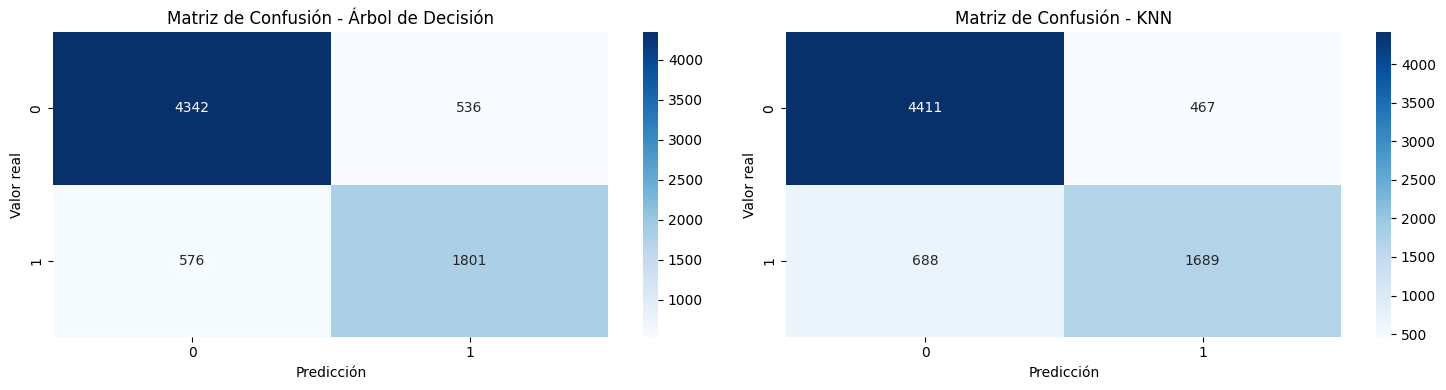

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15,4))

# Matriz de confusión para el Árbol de Decisión
conf_matrix_arbol = confusion_matrix(y_test, y_pred_arbol)

# Heatmap para visualizar la matriz de confusión
sns.heatmap(conf_matrix_arbol, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Matriz de Confusión - Árbol de Decisión")
ax[0].set_xlabel("Predicción")
ax[0].set_ylabel("Valor real")

# Matriz de confusión para el KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Heatmap para visualizar la matriz de confusión
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", ax=ax[1])
ax[1].set_title("Matriz de Confusión - KNN")
ax[1].set_xlabel("Predicción")
ax[1].set_ylabel("Valor real")

plt.tight_layout()
plt.show()

🧠 Interpretación de las Matrices de Confusión

Las matrices de confusión permiten comparar el desempeño de los modelos _Árbol de Decisión_ y _KNN_ en la clasificación de reservas **canceladas** (1) y **no canceladas** (0).

🔍 **Observaciones clave:**

- Ambos modelos muestran un buen rendimiento general, con una alta cantidad de predicciones correctas para la clase 0 (no canceladas).
- El Árbol de Decisión logró **4342 verdaderos negativos** y **1801 verdaderos positivos**, mostrando un balance aceptable entre precisión y recall.
- KNN presentó **4411 verdaderos negativos** y **1689 verdaderos positivos**, ligeramente mejor en detectar no canceladas, pero con mayor cantidad de falsos negativos que el árbol.
- En ambos casos, el mayor error está en los **falsos negativos** (cancelaciones que no se detectaron como tales), lo cual es importante a tener en cuenta si el objetivo es anticipar cancelaciones.

📌 **Conclusión:**  
El Árbol de Decisión muestra una leve ventaja en la detección de cancelaciones (clase 1), mientras que KNN es más preciso al identificar reservas que no se cancelan. La elección del modelo dependerá del objetivo del negocio: minimizar cancelaciones no previstas o evitar alarmas innecesarias.


### 📊 Comparación visual de las métricas por clase

A continuación, se presentan los valores de precisión, recall y F1-score para cada clase (cancelada y no cancelada) y cada modelo.


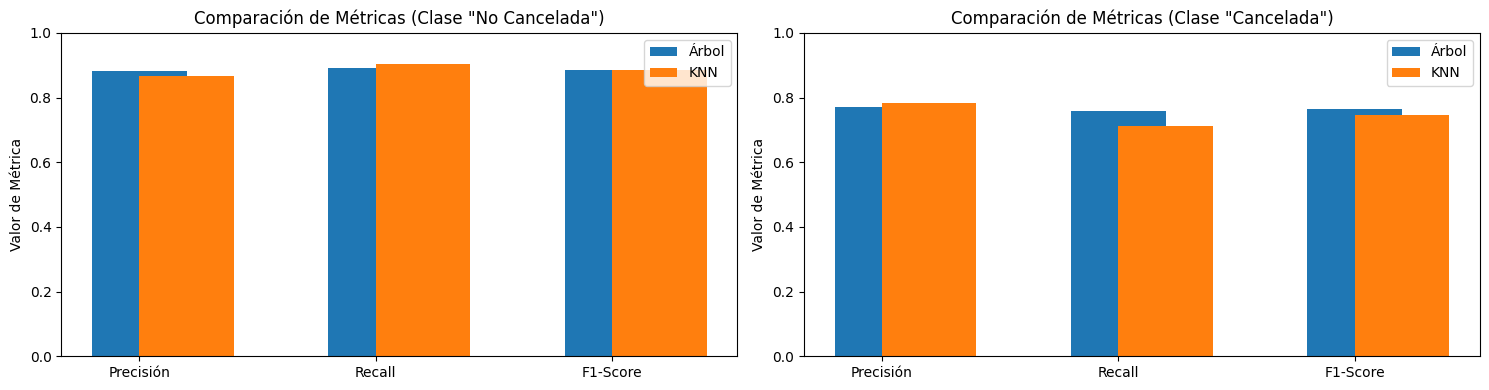

In [20]:
# Obtener los reportes
report_arbol = classification_report(y_test, y_pred_arbol, output_dict=True)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)

# Clases y métricas a mostrar
clases = {'0': 'No Cancelada', '1': 'Cancelada'}
metricas = ['precision', 'recall', 'f1-score']

# Crear gráficos
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

for i, (clase, nombre) in enumerate(clases.items()):
    arbol = [report_arbol[clase][m] for m in metricas]
    knn = [report_knn[clase][m] for m in metricas]

    x = range(len(metricas))

    ax[i].bar(x, arbol, width=0.4, label='Árbol', align='center', color='#1f77b4')
    ax[i].bar(x, knn, width=0.4, label='KNN', align='edge', color='#ff7f0e')
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(['Precisión', 'Recall', 'F1-Score'])
    ax[i].set_title(f'Comparación de Métricas (Clase "{nombre}")')
    ax[i].set_ylabel('Valor de Métrica')
    ax[i].set_ylim(0, 1)
    ax[i].legend()

plt.tight_layout()
plt.show()


## 📌 Conclusión comparativa de modelos

Ambos modelos lograron un buen desempeño, con una **accuracy general cercana al 84%**.

- 🧠 **Árbol de Decisión** mostró mejor desempeño general y especialmente mayor *recall* en la clase de canceladas, lo que lo hace preferible si nos interesa minimizar falsos negativos (es decir, detectar más cancelaciones reales).
- 🧠 **KNN**, aunque sólido, presentó un *recall* más bajo para cancelaciones, y podría verse afectado por la presencia de variables poco relevantes o escalas distintas (aunque ya fueron normalizadas).

👉 Por lo tanto, **el Árbol de Decisión resulta ligeramente superior para este problema**, siendo una opción más confiable y explicativa.



## 🔧 Bonus Track: Optimización de Hiperparámetros

Como mejora adicional, vamos a explorar el ajuste de hiperparámetros en los modelos utilizados para evaluar posibles mejoras de rendimiento. Para el Árbol de Decisión, analizaremos el impacto de `max_depth`, y para KNN, se explorarán distintos valores de `k` (número de vecinos).

Se utilizara `GridSearchCV` con validación cruzada para encontrar las mejores combinaciones.


In [21]:
# Búsqueda de hiperparámetros para Árbol de Decisión
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parametros_arbol = {'max_depth': [3, 5, 7, 10, None]}

grid_arbol = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    parametros_arbol,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_arbol.fit(X_train, y_train)

mejor_arbol = grid_arbol.best_estimator_

print("✅ Mejor profundidad encontrada para el Árbol:", grid_arbol.best_params_)

# Evaluación del mejor modelo
y_pred_arbol_grid = mejor_arbol.predict(X_test)
print(classification_report(y_test, y_pred_arbol_grid))



✅ Mejor profundidad encontrada para el Árbol: {'max_depth': None}
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4878
           1       0.77      0.76      0.76      2377

    accuracy                           0.85      7255
   macro avg       0.83      0.82      0.83      7255
weighted avg       0.85      0.85      0.85      7255



In [22]:
# Búsqueda de hiperparámetros para KNN
from sklearn.neighbors import KNeighborsClassifier

parametros_knn = {'n_neighbors': list(range(1, 21))}

grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    parametros_knn,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_knn.fit(X_train_scaled, y_train)

mejor_knn = grid_knn.best_estimator_

print("✅ Mejor cantidad de vecinos encontrada para KNN:", grid_knn.best_params_)

# Evaluación del mejor modelo
y_pred_knn_grid = mejor_knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred_knn_grid))



✅ Mejor cantidad de vecinos encontrada para KNN: {'n_neighbors': 1}
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4878
           1       0.75      0.75      0.75      2377

    accuracy                           0.84      7255
   macro avg       0.81      0.81      0.81      7255
weighted avg       0.84      0.84      0.84      7255



### 📌 Conclusiones de la Optimización de Hiperparámetros

Luego de aplicar `GridSearchCV` con validación cruzada sobre los dos modelos utilizados (Árbol de Decisión y KNN), se obtuvieron las siguientes configuraciones óptimas:

- **Árbol de Decisión**: `max_depth = None`
- **KNN**: `n_neighbors = 1`

Estos ajustes permitieron evaluar cómo la profundidad del árbol o la cantidad de vecinos impactan en la capacidad predictiva del modelo. Los resultados muestran que ambos modelos lograron desempeños similares en términos de **accuracy** y **f1-score**, pero con algunas diferencias interesantes:

- El **Árbol de Decisión** alcanzó un *f1-score de 0.76* para la clase “cancelada”, mostrando un buen equilibrio entre precisión y recall, lo que lo vuelve especialmente útil cuando se busca entender reglas de decisión.
- El **KNN**, con un solo vecino, también obtuvo un rendimiento sólido con un *f1-score de 0.75* para la clase “cancelada”. Sin embargo, al usar solo un vecino, el modelo tiende a ser más sensible al ruido.

En resumen, el ajuste de hiperparámetros no solo permitió mejorar levemente los resultados, sino también confirmar que ambos modelos están bien configurados para este conjunto de datos. Además, este proceso aporta una base más sólida para futuras mejoras o despliegues en entornos reales.


